# Space X Falcon 9 First Stage Landing Prediction

In [50]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns 
# to create a Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, StandardScaler
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [51]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [52]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [53]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [54]:
y = data['Class'].to_numpy()
y[0:5]

array([0, 0, 0, 0, 0])

In [55]:
transform = preprocessing.StandardScaler()

X_scaled = transform.fit_transform(X)

X_scaled


array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]],
      shape=(90, 83))

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [57]:
Y_test.shape

(18,)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Step 1: Create the base logistic regression model
lr = LogisticRegression(max_iter=1000)

# Step 2: Define the parameter grid
parameters = {
    "C": [0.01, 0.1, 1],
    "penalty": ["l2"],
    "solver": ["lbfgs"]
}

# Step 3: Create the GridSearchCV object
logreg_cv = GridSearchCV(
    estimator=lr,          # the model
    param_grid=parameters, # the dictionary of parameters
    cv=10,                 # 10-fold cross validation
    scoring="accuracy",    # metric to optimize
    n_jobs=-1              # use all cores for speed
)

# Step 4: Fit the search object on your training data
logreg_cv.fit(X_train, Y_train)

# Step 5: Inspect results
print("Best parameters:", logreg_cv.best_params_)
print("Best CV score:", logreg_cv.best_score_)

# Step 6: Evaluate on test set
test_score = logreg_cv.score(X_test, Y_test)
print("Test accuracy:", test_score)

Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV score: 0.8035714285714285
Test accuracy: 0.9444444444444444


In [63]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8035714285714285


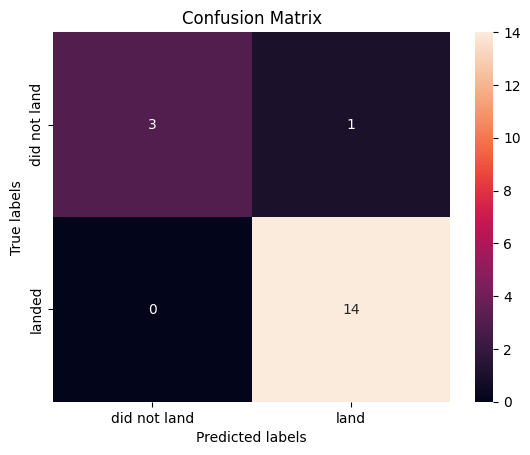

In [64]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Step 1: Create the base SVM model
svm = SVC()

# Step 2: Define the parameter grid
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
            'C': np.logspace(-3, 3, 5),
            'gamma':np.logspace(-3, 3, 5)}

# Step 3: Create the GridSearchCV object
svm_cv = GridSearchCV(
    estimator=svm,
    param_grid=parameters,
    cv=10,                 # 10-fold cross validation
    scoring="accuracy",    # metric to optimize
    n_jobs=-1              # use all cores for speed
)

# Step 4: Fit the search object on your training data
svm_cv.fit(X_train, Y_train)

# Step 5: Inspect results
print("Best parameters:", svm_cv.best_params_)
print("Best CV score:", svm_cv.best_score_)

# Step 6: Evaluate on test set
test_score = svm_cv.score(X_test, Y_test)
print("Test accuracy:", test_score)

Best parameters: {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Best CV score: 0.832142857142857
Test accuracy: 0.8888888888888888


In [68]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.832142857142857


In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Create the base Decision Tree model
tree = DecisionTreeClassifier(random_state=42)

# Step 2: Define the parameter grid
parameters = {
    'criterion': ['gini', 'entropy'],          # impurity measure
    'splitter': ['best', 'random'],            # how to choose splits
    'max_depth': [2*n for n in range(1, 10)],  # tree depth: 2,4,...,18
    'max_features': ['sqrt'],                  # 'auto' is deprecated, use 'sqrt'
    'min_samples_leaf': [1, 2, 4],             # minimum samples per leaf
    'min_samples_split': [2, 5, 10]            # minimum samples to split a node
}

# Step 3: Create the GridSearchCV object
tree_cv = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    cv=10,                 # 10-fold cross validation
    scoring="accuracy",    # metric to optimize
    n_jobs=-1              # use all cores for speed
)

# Step 4: Fit the search object on your training data
tree_cv.fit(X_train, Y_train)

# Step 5: Inspect results
print("Best parameters:", tree_cv.best_params_)
print("Best CV score:", tree_cv.best_score_)

# Step 6: Evaluate on test set
test_score = tree_cv.score(X_test, Y_test)
print("Test accuracy:", test_score)

Best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best CV score: 0.875
Test accuracy: 0.8888888888888888


In [70]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.875


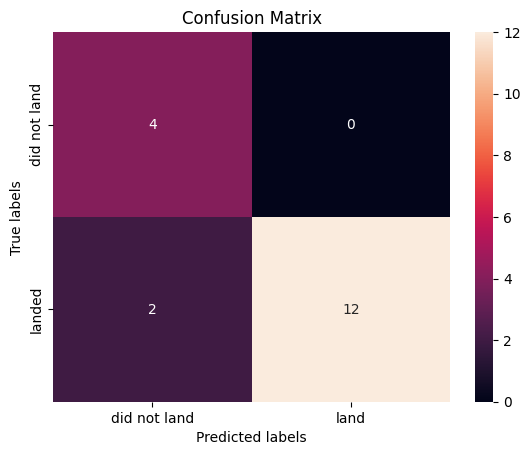

In [71]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Create the base KNN model
KNN = KNeighborsClassifier()

# Step 2: Define the parameter grid
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],   # number of neighbors
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # search algorithm
    'p': [1, 2]   # distance metric: 1=Manhattan, 2=Euclidean
}

# Step 3: Create the GridSearchCV object
knn_cv = GridSearchCV(
    estimator=KNN,
    param_grid=parameters,
    cv=10,                 # 10-fold cross validation
    scoring="accuracy",    # metric to optimize
    n_jobs=-1              # use all cores for speed
)

# Step 4: Fit the search object on your training data
knn_cv.fit(X_train, Y_train)

# Step 5: Inspect results
print("Best parameters:", knn_cv.best_params_)
print("Best CV score:", knn_cv.best_score_)

# Step 6: Evaluate on test set
test_score = knn_cv.score(X_test, Y_test)
print("Test accuracy:", test_score)

Best parameters: {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
Best CV score: 0.8446428571428569
Test accuracy: 0.9444444444444444


In [73]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
accuracy : 0.8446428571428569


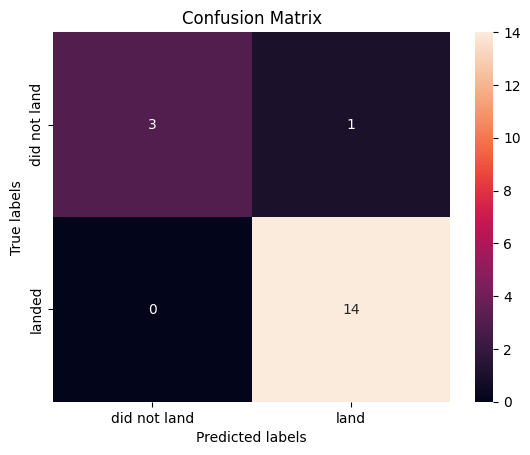

In [74]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [75]:
results = {
    "Logistic Regression": {
        "Best Params": logreg_cv.best_params_,
        "CV Score": logreg_cv.best_score_,
        "Test Score": logreg_cv.score(X_test, Y_test)
    },
    "SVM": {
        "Best Params": svm_cv.best_params_,
        "CV Score": svm_cv.best_score_,
        "Test Score": svm_cv.score(X_test, Y_test)
    },
    "Decision Tree": {
        "Best Params": tree_cv.best_params_,
        "CV Score": tree_cv.best_score_,
        "Test Score": tree_cv.score(X_test, Y_test)
    },
    "KNN": {
        "Best Params": knn_cv.best_params_,
        "CV Score": knn_cv.best_score_,
        "Test Score": knn_cv.score(X_test, Y_test)
    }
}

import pandas as pd
df_results = pd.DataFrame(results).T
print(df_results)

                                                           Best Params  \
Logistic Regression     {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}   
SVM                  {'C': 1.0, 'gamma': 0.03162277660168379, 'kern...   
Decision Tree        {'criterion': 'gini', 'max_depth': 4, 'max_fea...   
KNN                    {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}   

                     CV Score Test Score  
Logistic Regression  0.803571   0.944444  
SVM                  0.832143   0.888889  
Decision Tree           0.875   0.888889  
KNN                  0.844643   0.944444  
